### **SIR model**
**Popis:**
- S (susceptible) – lidé, kteří mohou onemocnět
- I (infected) – aktuálně nakažení
- R (recovered) – uzdravení nebo s imunitou

**Rovnice:**
- dS/dt = -β * S * I
- dI/dt = β * S * I - γ * I
- dR/dt = γ * I 

Změny závisí na **infekčnosti** *(beta)* a **rychlost uzdravení** *(gamma)*

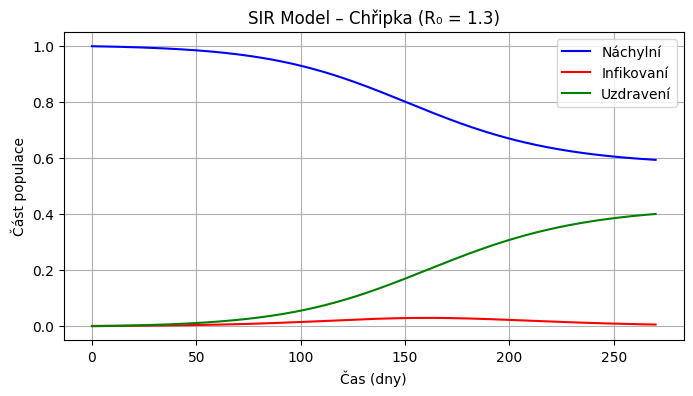

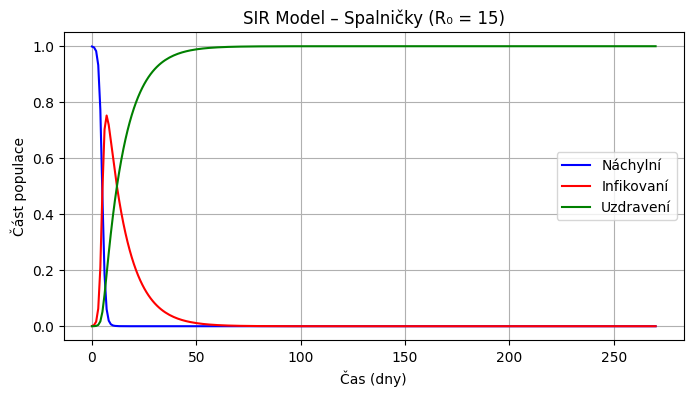

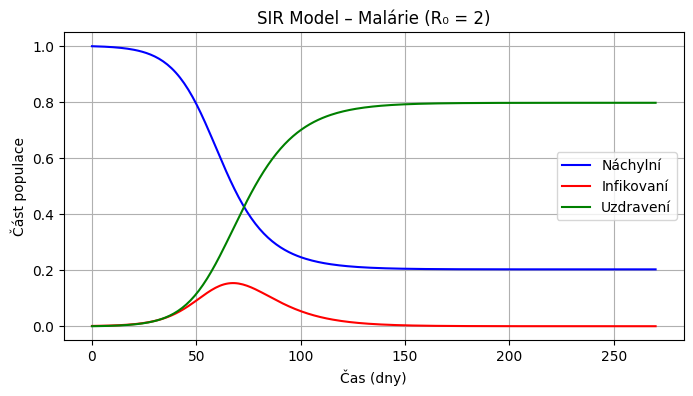

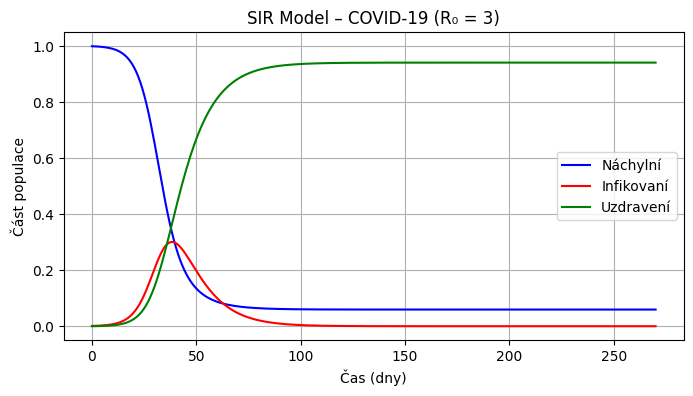

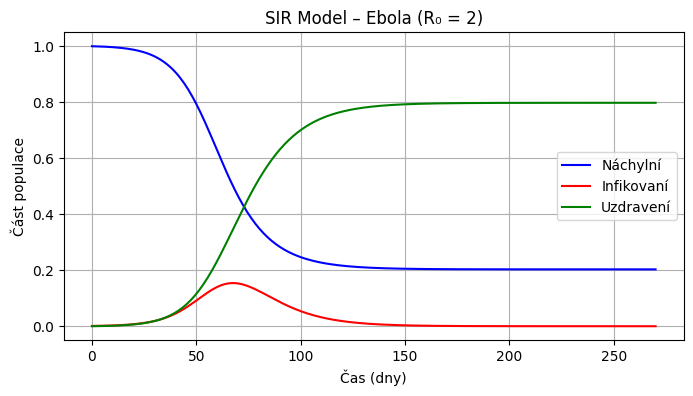

In [1]:
import numpy as np                           
from scipy.integrate import odeint 
import matplotlib.pyplot as plt   

def sir_model(y, t, beta, gamma):
    S, I, R = y  
    dSdt = -beta * S * I 
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I                         
    return [dSdt, dIdt, dRdt]                # Vrácení derivací pro odeint

# Definování nemocí a jejich základního reprodukčního čísla R₀ = beta / gamma
nemoce = {
    'Chřipka': 1.3,
    'Spalničky': 15,
    'Malárie': 2,
    'COVID-19': 3,
    'Ebola': 2
}

N = 1000                                     # Celkový počet jedinců v populaci
I0 = 1                                       # Počet počátečně infikovaných
R0 = 0                                       # Počet počátečně uzdravených
S0 = N - I0 - R0                             # Zbytek populace je náchylný
t = np.linspace(0, 270, 270)                 

for nemoce, R_0 in nemoce.items():
    gamma = 1/10                             # Průměrná doba uzdravení = 10 dní
    beta = R_0 * gamma 
    y0 = [S0/N, I0/N, R0/N] 

    ret = odeint(sir_model, y0, t, args=(beta, gamma))  # ret obsahuje matice [S, I, R] v čase
    S, I, R = ret.T                         # Transpozice matice: oddělení jednotlivých proměnných

    # Vykreslení
    plt.figure(figsize=(8, 4))
    plt.plot(t, S, 'b', label='Náchylní') 
    plt.plot(t, I, 'r', label='Infikovaní')
    plt.plot(t, R, 'g', label='Uzdravení') 
    plt.title(f"SIR Model – {nemoce} (R₀ = {R_0})") 
    plt.xlabel('Čas (dny)') 
    plt.ylabel('Část populace')
    plt.legend() 
    plt.grid()
    plt.show() 


##### **Otázky:**
**Kdy dojde k vrcholu epidemie?**
- V době, kdy počet nakažených dosahuje maxima.
- **Chřipka:** cca kolem 160 dne
- **Spalničky:** cca kolem 5 dne
- **Malárie:** cca kolem 70 dne
- **COVID-19:** cca kolem 40 dne
- **Ebola:** cca kolem kolem 70 dne

**Jak dlouho epidemie potrvá?**
- Záleží na infekčnosti nemoci. Dokud červená křivka nedosáhne 0.

**Kolik jedinců nakonec onemocní a kolik ne?**
- Počet celkových nakažených je ukázán na zelené křivce 
- **Chřipka:** onemocní cca 40% populace a cca 60% se ani nenakazí
- **Spalničky:** onemocní cca 95% populace a cca 5% se ani nenakazí
- **Malárie:** onemocní cca 80% populace a cca 20% se ani nenakazí
- **COVID-19:** onemocní cca 85% populace a cca 15% se ani nenakazí
- **Ebola:** onemocní cca 80% populace a cca 20% se ani nenakazí

------------------------------------------------------------------------------------------------


### **Model Lotka-Volterra**
**Popis:**
simuluje populaci predátora(lišky) a kořisti(zajíce) s přidáním třetího druhu(vlka)

**Rovnice:**
- *dx/dt = αx - βxy* = růst kořisti, redukce kvůli predátorům
- *dy/dt = δxy - γy* = růst predátorů při dostatku kořisti

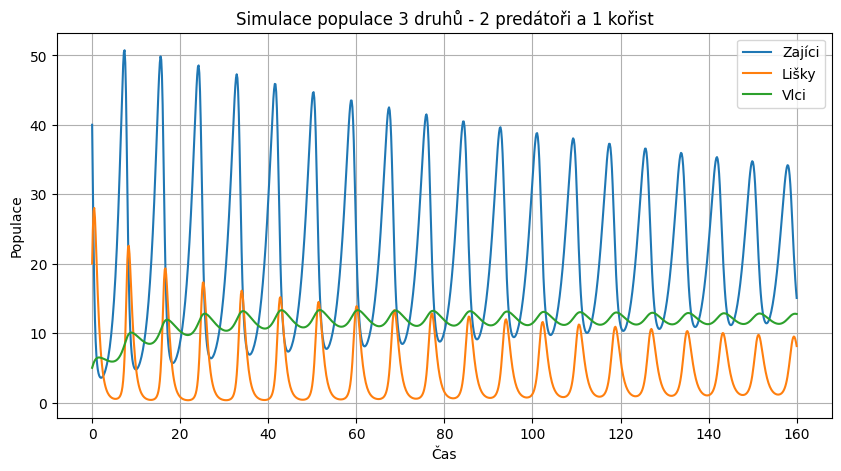

In [22]:
def lotka_volterra(X, t, alpha, beta, delta, gamma, epsilon, zeta, eta, theta, mu):
    kořist, predátor, konkurent = X
    dKořist_dt = alpha * kořist - beta * kořist * predátor - epsilon * kořist * konkurent    # Zajíce loví lišky a vlci
    dPredátor_dt = delta * kořist * predátor - gamma * predátor - eta * predátor * konkurent # Lišky žijí ze zajíců, ale loví je vlk
    dKonkurent_dt = zeta * kořist + theta * predátor - mu * konkurent                        # Vlk žije ze zajíců i lišek, má nižší útlum
    return [dKořist_dt, dPredátor_dt, dKonkurent_dt]

# Parametry
alpha = 1.0         # Růst zajíců
beta = 0.1          # Úbytek zajíců kvůli liškám
delta = 0.075       # Přírůstek lišek díky zajícům
gamma = 1.2         # Úmrtnost lišek
epsilon = 0.05      # Vliv vlků na zajíce
eta = 0.03          # Vliv vlků na lišky
zeta = 0.05         # Růst vlků ze zajíců
theta = 0.04        # Růst vlků z lišek
mu = 0.1            # Útlum vlčí populace 

# Zajíci, Lišky, Vlci
X0 = [40, 20, 5]     


t = np.linspace(0, 160, 1000)

# Řešení
sol = odeint(lotka_volterra, X0, t, args=(alpha, beta, delta, gamma, epsilon, zeta, eta, theta, mu))
kořist, predátor, konkurent = sol.T

# Graf
plt.figure(figsize=(10, 5))
plt.plot(t, kořist, label="Zajíci")
plt.plot(t, predátor, label="Lišky")
plt.plot(t, konkurent, label="Vlci")
plt.title("Simulace populace 3 druhů - 2 predátoři a 1 kořist")
plt.xlabel("Čas")
plt.ylabel("Populace")
plt.legend()
plt.grid()
plt.show()


##### **Popis simulace:**
Na grafu můžeme vidět, že populace zajíců a lišek drasticky klesá, kvůli agresivní populaci vlků, která naopak stoupá.

------------------------------------------------------------------------------

### **Vlastní model**
**Šíření dezinformací** - Monte Carlo model

**Popis:**
Pracuje na principu pravděpodobnosti náhodných setkání agentů (lidí)

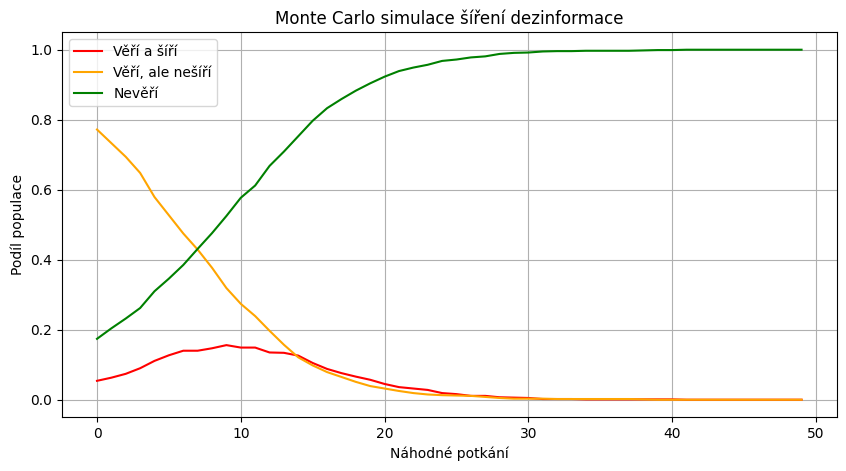

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parametry
A = 1000
p_uveri = 0.3
p_neveri = 0.2
potkani = 50

# Počáteční populace
lide = ['N'] * 800 + ['S'] * 50 + ['Ne'] * 150
history = {'N': [], 'S': [], 'Ne': []}

for step in range(potkani):
    random.shuffle(lide)
    lide2 = lide[:]

    for i in range(0, A, 2):
        a, b = lide[i], lide[i+1]

        # N potká S
        if (a == 'N' and b == 'S') or (a == 'S' and b == 'N'):
            if random.random() < p_uveri:
                if a == 'N':
                    lide2[i] = 'S'
                if b == 'N':
                    lide2[i+1] = 'S'

        # S nebo N potká Ne → může přestat věřit
        for idx, pair in [(i, b), (i+1, a)]:
            if (lide[idx] in ['S', 'N']) and (pair == 'Ne'):
                if random.random() < p_neveri:
                    lide2[idx] = 'Ne'

    lide = lide2
    history['S'].append(lide.count('S') / N)
    history['N'].append(lide.count('N') / N)
    history['Ne'].append(lide.count('Ne') / N)

# Graf
plt.figure(figsize=(10, 5))
plt.plot(history['S'], label="Věří a šíří", color="red")
plt.plot(history['N'], label="Věří, ale nešíří", color="orange")
plt.plot(history['Ne'], label="Nevěří", color="green")
plt.title("Monte Carlo simulace šíření dezinformace")
plt.xlabel("Náhodné potkání")
plt.ylabel("Podíl populace")
plt.legend()
plt.grid()
plt.show()


#### **Popis grafu:**
- Nevěřící neustále narůstají
- Šířící mohou ubýt, pokud narazí na Nevěřící
- Nešířící mohou narůst, pokud narazí na Šířící nebo ubýt, pokud narazí na Nevěřící